# Survival Analysis Treatment of Avengers Dataset from FiveThirtyEight.com Blog post


In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import lifelines as life
import os
plt.style.use('fivethirtyeight') # Good looking plots

In [2]:
os.chdir('../../datasets/survivalData/')

In [3]:
avenger_file = 'avengers.csv'
avengersdf = pd.read_csv(avenger_file)
avengersdf.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [4]:
avengersdf.columns

Index([u'URL', u'Name/Alias', u'Appearances', u'Current?', u'Gender', u'Probationary Introl', u'Full/Reserve Avengers Intro', u'Year', u'Years since joining', u'Honorary', u'Death1', u'Return1', u'Death2', u'Return2', u'Death3', u'Return3', u'Death4', u'Return4', u'Death5', u'Return5', u'Notes'], dtype='object')

In [5]:
avengersdf[['Name/Alias','Years since joining','Death1','Return1']].head()

,Name/Alias,Years since joining,Death1,Return1
0,"Henry Jonathan ""Hank"" Pym",52,YES,NO
1,Janet van Dyne,52,YES,YES
2,"Anthony Edward ""Tony"" Stark",52,YES,YES
3,Robert Bruce Banner,52,YES,YES
4,Thor Odinson,52,YES,YES


In [6]:
print "There are {0} characters represented in this Avengers Database".format(len(avengersdf))

There are 173 characters represented in this Avengers Database


In [7]:
avengersdf['Years since joining'].describe()

count    173.000000
mean      26.554913
std       30.374669
min        0.000000
25%        5.000000
50%       19.000000
75%       36.000000
max      115.000000
Name: Years since joining, dtype: float64

<IPython.core.display.Javascript object>


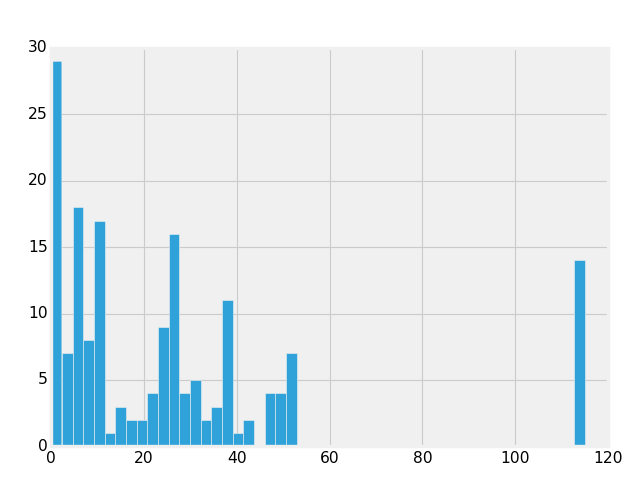

In [8]:
avengersdf['Years since joining'].hist(bins=50)

In [9]:
avengersdf.Death1.unique()

array(['YES', 'NO'], dtype=object)

In [10]:
avengersdf.Death1.value_counts()

NO     104
YES     69
dtype: int64

In [11]:
avengersdf['death1status'] = avengersdf.Death1.apply(lambda x: 0 if x == 'NO' else 1)

In [12]:
kmf = life.KaplanMeierFitter()

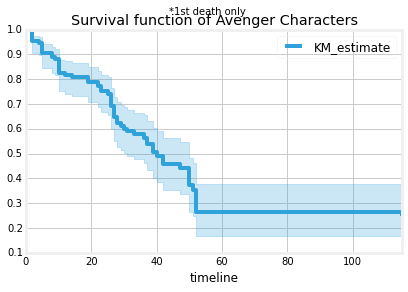

In [47]:
kmf.fit(avengersdf['Years since joining'],avengersdf['death1status']).plot()
plt.title('Survival function of Avenger Characters')
plt.suptitle('*1st death only')

## consider different factors
* Gender
* Honorary
* Appearances

In [15]:
avengersdf.columns

Index([u'URL', u'Name/Alias', u'Appearances', u'Current?', u'Gender', u'Probationary Introl', u'Full/Reserve Avengers Intro', u'Year', u'Years since joining', u'Honorary', u'Death1', u'Return1', u'Death2', u'Return2', u'Death3', u'Return3', u'Death4', u'Return4', u'Death5', u'Return5', u'Notes', u'death1status'], dtype='object')

In [16]:
avengersdf['Honorary'].value_counts()#.sum()#,'Probationary Introl']].tail()

Full            138
Academy          17
Honorary         16
Probationary      2
dtype: int64

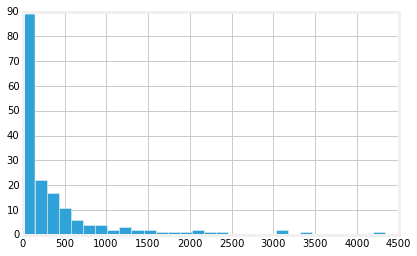

In [21]:
%matplotlib inline
avengersdf.Appearances.hist(bins=30)


(array([  2.,   1.,   1.,   0.,   2.,   0.,   1.,   2.,   3.,   7.,   8.,
          8.,   8.,  14.,  10.,  14.,  10.,  11.,   9.,   7.,  10.,   7.,
         10.,   6.,   5.,   5.,   4.,   4.,   2.,   2.]),
 array([ 0.69314718,  0.94917612,  1.20520506,  1.461234  ,  1.71726295,
         1.97329189,  2.22932083,  2.48534977,  2.74137871,  2.99740765,
         3.25343659,  3.50946554,  3.76549448,  4.02152342,  4.27755236,
         4.5335813 ,  4.78961024,  5.04563918,  5.30166813,  5.55769707,
         5.81372601,  6.06975495,  6.32578389,  6.58181283,  6.83784177,
         7.09387071,  7.34989966,  7.6059286 ,  7.86195754,  8.11798648,
         8.37401542]),
 <a list of 30 Patch objects>)

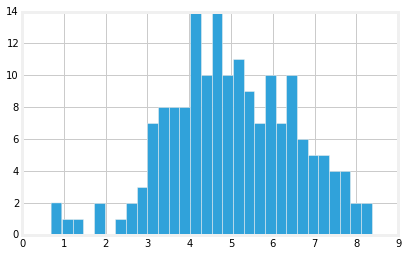

In [23]:
plt.hist(np.log(avengersdf.Appearances.values),bins=30)


In [17]:
#Categorical encode 
avengersdf['male'] = avengersdf['Gender'].apply(lambda x: 0 if x == 'FEMALE' else 1)
avengersdf['active']=avengersdf['Current?'].apply(lambda x: 0 if x == 'NO' else 1)
avengersdf['full']= avengersdf['Honorary'].apply(lambda x: 1 if x == 'Full' else 0)

In [24]:
avengersdf['logAppear']= np.log(avengersdf.Appearances.values)

In [36]:
import patsy
Xavengers = patsy.dmatrix('logAppear + male + active + full -1',avengersdf,return_type='dataframe')
#omit intercept because it was giving me fits
Xavengers['T']=avengersdf['Years since joining']
Xavengers['E']=avengersdf.death1status

In [37]:
[(c,sum(Xavengers[c].isnull())) for c in Xavengers.columns]

[('logAppear', 0), ('male', 0), ('active', 0), ('full', 0), ('T', 0), ('E', 0)]

In [38]:
Xavengers.columns,len(Xavengers)

(Index([u'logAppear', u'male', u'active', u'full', u'T', u'E'], dtype='object'),
 173)

In [39]:
cf_death = life.CoxPHFitter()
cf_death.fit(Xavengers,'T','E')

<lifelines.CoxPHFitter: fitted with 173 observations, 104 censored>

In [41]:
cf_death.summary

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
logAppear,-0.427107,0.652394,0.136788,-3.122394,0.001794,-0.695266,-0.158948
male,0.090112,1.094296,0.126663,0.711427,0.476820,-0.158198,0.338421
active,-0.337833,0.713314,0.148338,-2.277460,0.022759,-0.628633,-0.047033
full,0.965445,2.625955,0.195214,4.945577,0.000001,0.582749,1.348141


In [42]:
cf_death.print_summary()

n=173, number of events=69

                coef  exp(coef)  se(coef)          z         p  lower 0.95  upper 0.95     
logAppear -4.271e-01  6.524e-01 1.368e-01 -3.122e+00 1.794e-03  -6.953e-01  -1.589e-01   **
male       9.011e-02  1.094e+00 1.267e-01  7.114e-01 4.768e-01  -1.582e-01   3.384e-01     
active    -3.378e-01  7.133e-01 1.483e-01 -2.277e+00 2.276e-02  -6.286e-01  -4.703e-02    *
full       9.654e-01  2.626e+00 1.952e-01  4.946e+00 7.592e-07   5.827e-01   1.348e+00  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.688


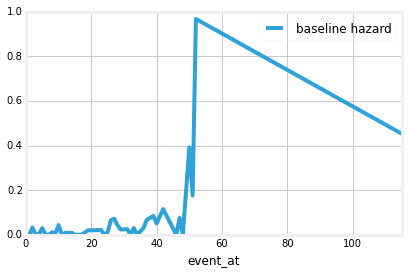

In [44]:
cf_death.baseline_hazard_.plot()

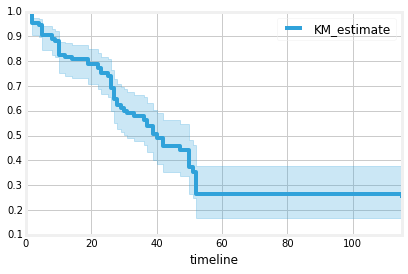

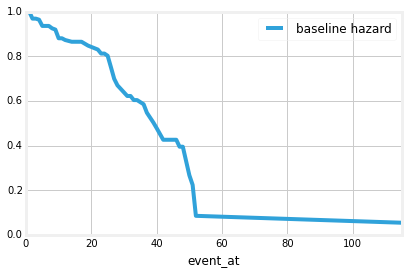

In [50]:
#cf_death.baseline_survival_.plot()
kmf.fit(avengersdf['Years since joining'],avengersdf['death1status']).plot()
cf_death.baseline_survival_.plot()

In [54]:
np.exp(cf_death.hazards_)

,logAppear,male,active,full
coef,0.652394,1.094296,0.713314,2.625955


In [53]:
Xavengers.ix[13]

logAppear     6.943122
male          1.000000
active        1.000000
full          1.000000
T            47.000000
E             1.000000
Name: 13, dtype: float64

In [58]:
print Xavengers['T'].describe()
time_range = np.linspace(Xavengers['T'].min(),85,86)

count    173.000000
mean      26.554913
std       30.374669
min        0.000000
25%        5.000000
50%       19.000000
75%       36.000000
max      115.000000
Name: T, dtype: float64


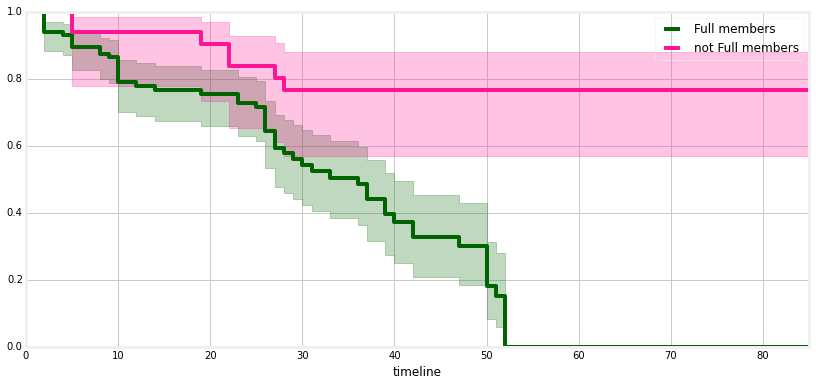

In [61]:
fig = plt.figure(figsize=(12.5,6))
kmf_type = life.KaplanMeierFitter()
# split by full or not
fullmbrs = Xavengers[Xavengers.full==1]
othrmbrs = Xavengers[Xavengers.full==0]

kmf_type.fit(fullmbrs['T'], timeline=time_range, event_observed=fullmbrs['E'],label='Full members')

ax = fig.add_subplot(111)
kmf_type.plot(ax=ax,c='darkgreen')

kmf_type.fit(othrmbrs['T'], timeline=time_range, event_observed=othrmbrs['E'],label='not Full members')
kmf_type.plot(ax=ax, c='deeppink')